In [7]:
import pandas as pd
import geobr
import numpy as np
import os
import geopandas as gpd
from shapely import wkt


In [8]:
from pathlib import Path

# `cwd`: current directory is straightforward
basepath = str(Path.cwd().parent) + '/map/data'
basepath


'/Users/feliphlvo/access-to-education/map/data'

In [9]:
access_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/access_df.csv")
access_df = gpd.GeoDataFrame(access_df, geometry = access_df["geometry"].apply(wkt.loads), crs = "EPSG:5641")

In [26]:
access_df.columns

Index(['sector_id', '3sfca_n_classes', 'e2sfca_n_classes', 'state',
       'n_households', 'n_people', 'avg_monthly_earnings',
       'n_people_15to17_white', 'n_people_15to17_black',
       'n_people_15to17_asian', 'n_people_15to17_parda',
       'n_people_15to17_indigenous', 'n_people_15', 'n_people_16',
       'n_people_17', 'n_people_15_men', 'n_people_16_men', 'n_people_17_men',
       'n_people_15_women', 'n_people_16_women', 'n_people_17_women',
       'n_people_15to17dem', 'n_people_15to17_alternative', 'state_id',
       'state_abbrev', 'city_id', 'city_name', 'district_id', 'district_name',
       'subdistrict_id', 'subdistrict_name', 'neighborhood_name',
       'neighborhood_id', 'geometry', 'microregion_id', 'microregion_name',
       'mesoregion_id', 'mesoregion_name', 'n_people_15to17', 'A', 'Q', 'H',
       'pct_black', 'pct_white', 'pct_indigenous', 'pct_pardos', 'pct_asian',
       'pct_men', 'area', 'density', 'zone_rural', 'zone_urban',
       'region_Midwest', 'regi

In [27]:
# Find null or empty geometries
access_df[access_df.geometry.is_empty]['neighborhood_name']

19075               NaN
19076               NaN
19077               NaN
19078               NaN
19079               NaN
19080               NaN
20075               NaN
20081               NaN
20352               NaN
20353               NaN
22104               NaN
23308               NaN
23309               NaN
23535               NaN
23536               NaN
23566               NaN
23567               NaN
23568               NaN
23576               NaN
57193               NaN
137352    Praia Do Sapê
150360              NaN
154529              NaN
169583              NaN
209317              NaN
257877              NaN
280071              NaN
295050              NaN
Name: neighborhood_name, dtype: object

In [28]:
# Sampling one point for each 10 people in school age, skipping null geometries
non_empty_access_df = access_df[~access_df.geometry.is_empty]
sampled_points = non_empty_access_df.sample_points(size = np.floor(non_empty_access_df['n_people_15to17']/10).astype(int))

In [ ]:
access_df['points'] = sampled_points

## Test/Example

In [21]:
# Generate random points inside each polygon in access df using sample_points()
sub_df = access_df[:1000]
sample_sub = sub_df.sample_points(size = np.floor(access_df['n_people_15to17'][:1000]/10).astype(int))



/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/tools/_random.py:83: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  return GeoSeries(candidates[:size]).unary_union
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/tools/_random.py:83: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  return GeoSeries(candidates[:size]).unary_union
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/tools/_random.py:83: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  return GeoSeries(candidates[:size]).unary_union
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/tools/_random.py:83: Futur

<AxesSubplot:>

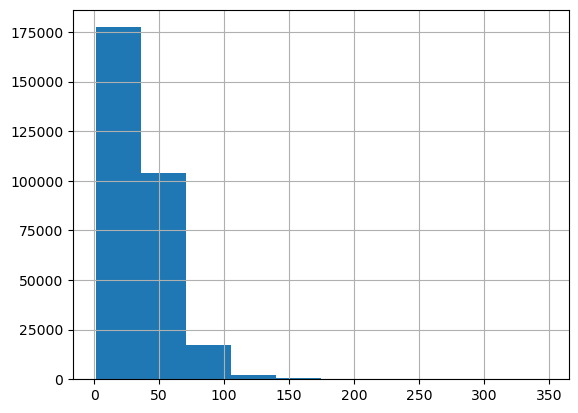

In [12]:
m = sub_df.explore()
sample_sub.explore(m=m, color='red')